# Clustering - KMEANS
* Simple code for kmeans Clustering 
* Supporting graphs for cluster size selection
* dataset: xclara from https://github.com/mubaris/friendly-fortnight

In [1]:
import os, time

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Declaring header
# header = ['V1','V2']

# Affinity and Linkage
af_type = 'euclidean'
lk_type = 'complete'

# Reading the data
folderName = '../data/' 
fileName   = 'xclara.data'

df = pd.read_csv(folderName+fileName,sep=',')#,names=header)

# Printing some info about the data
print("[INFO]\nNrow: {}\nNcol: {}".format(df.shape[0],df.shape[1]))
df.head(3)

[INFO]
Nrow: 3000
Ncol: 2


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176


In [6]:
df.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [11]:
# # If necessary, dropping cols
# cols = df.columns # List of columns in dataframe
# drop = [cols[-1]] # List of columns to drop
# df.drop(labels=drop,axis=1,inplace=True)
# df.head(3)

# Assigning data to variable
X = df.values

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# Creating 20 random initial centroids
kmeans = KMeans(n_clusters=20, init='random', n_init=1, max_iter=1, tol=0.0001, 
                precompute_distances='auto', verbose=0, random_state=None, 
                n_jobs=None, algorithm='auto')

# Fitting the model
kmeans.fit(X)

# Retreiving cluster centers
init_centroids = kmeans.cluster_centers_

In [48]:
# From 2 to 20 clusters 
k_values = range(2,21)

# Looping over each cluster
final_results=pd.DataFrame()
for k in k_values:
    # Assigning number of clusters
    kmeans = KMeans(n_clusters=k, init=init_centroids[0:k,:], n_init=1, max_iter=10, tol=0.0001, 
                precompute_distances='auto', verbose=0, random_state=42, copy_x=True, 
                n_jobs=None, algorithm='auto')
    # Fitting and predicting labels
    cluster_labels = kmeans.fit_predict(X)
    # Calculating mean intra-cluster distance
    score_wss = round(kmeans.inertia_ ,2)
    # Calculating silhouette score (b-a)/max(a,b)
    silhouette = round(silhouette_score(X, cluster_labels),4)
    # Creating dictionary to store values
    aux_results = {'score_wss': score_wss, 'silhouette': silhouette}
    # Assigning dictionary to dataframe
    aux_results = pd.DataFrame(aux_results, index = [k])
    # Concatenating aux values with final results
    final_results = pd.concat([final_results, aux_results], axis =0)

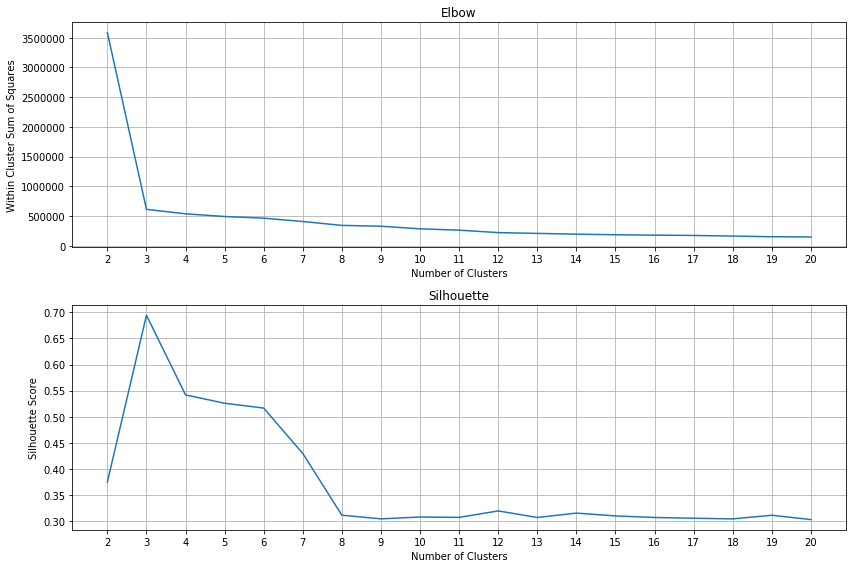

In [49]:
# Plotting results
fig, ax = plt.subplots(2,1,figsize=(12,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)

ax[0].plot(final_results.index,final_results.score_wss)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Within Cluster Sum of Squares')
ax[0].set_title('Elbow')
ax[0].set_xticks(k_values)
ax[0].set_xticklabels(k_values)
ax[0].grid()


ax[1].plot(final_results.index,final_results.silhouette)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette')
ax[1].set_xticks(k_values)
ax[1].set_xticklabels(k_values)
ax[1].grid()

fig.tight_layout()
plt.show()

In [18]:
print(final_results)

    score_wss  silhouette
2   3586632.1      0.3750
3    611605.9      0.6946
4    536843.5      0.5418
5    491292.1      0.5259
6    463414.3      0.5166
7    407151.8      0.4295
8    341772.5      0.3113
9    327940.5      0.3043
10   284028.0      0.3078
11   261582.3      0.3071
12   220218.9      0.3195
13   206982.6      0.3069
14   194276.9      0.3153
15   184226.0      0.3099
16   177683.8      0.3069
17   172615.4      0.3055
18   162350.7      0.3042
19   150816.6      0.3112
20   146774.7      0.3029


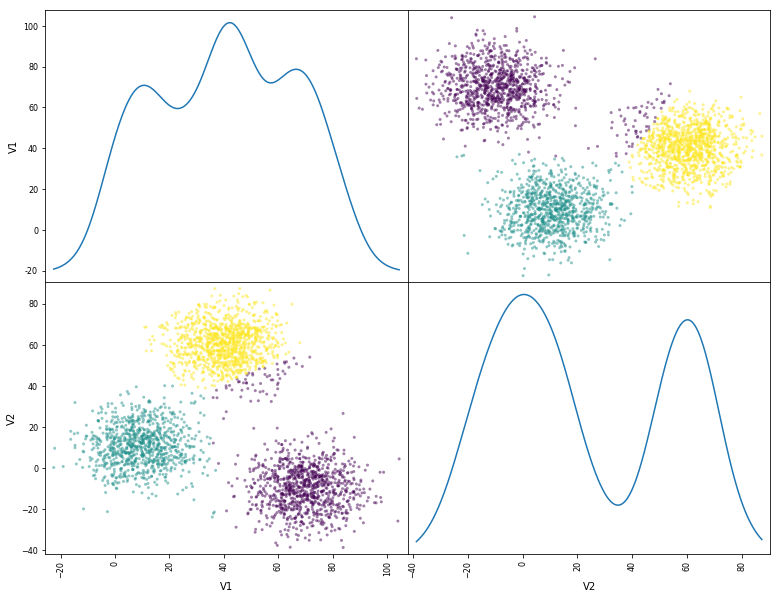

In [45]:
# Setting number of clusters to the greatest value in silhouette score
K_best = final_results['silhouette'].idxmax()
kmeans = KMeans(n_clusters=K_best, init=init_centroids[0:K_best,:], n_init=1, max_iter=1, tol=0.0001, 
                precompute_distances='auto', verbose=0, random_state=None, 
                n_jobs=None, algorithm='auto')

# Fitting the model
kmeans.fit(X)

# Importing scatter matrix
from pandas.plotting import scatter_matrix

# K-MEANS CLUSTERING
# Plotting the scatter matrix 
spm = scatter_matrix(df, alpha=0.5, figsize=(13, 10), diagonal='kde', 
                     c=kmeans.labels_, facecolors=None)
plt.show()